In [1]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/k-디지털/범죄발생수.csv',encoding = "utf-8",engine = 'python')
df2 = pd.read_csv('/content/drive/MyDrive/2023/k-디지털/인구밀도.csv',encoding = "CP949", engine = 'python')

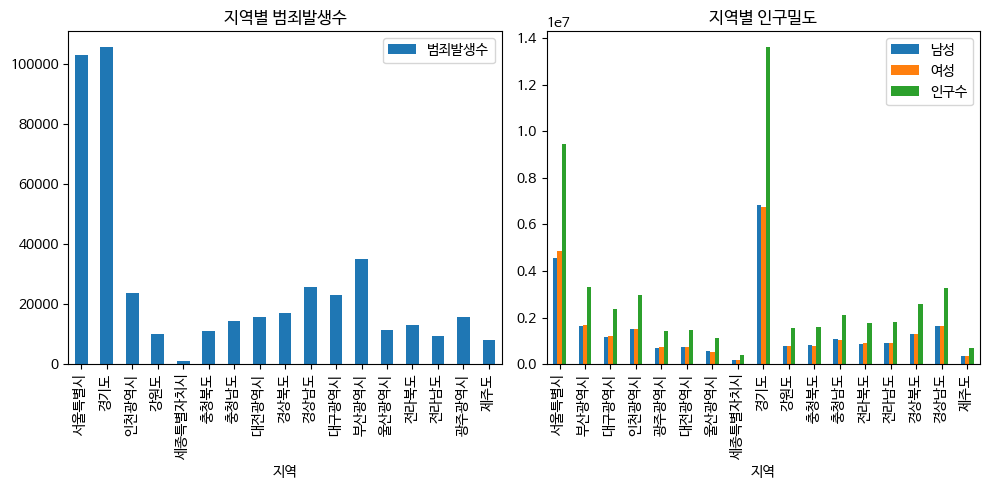

In [4]:
# 지역을 인덱스로 설정
df1.set_index('지역', inplace=True)
df2.set_index('지역', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df1.plot(kind='bar', ax=ax[0])
df2.plot(kind='bar', ax=ax[1])
ax[0].set_title('지역별 범죄발생수')
ax[1].set_title('지역별 인구밀도')
plt.tight_layout()
plt.show()

In [5]:
from matplotlib.cm import datad
# 데이터 합치기
data = pd.merge(df1, df2, on='지역',how='left')

# 인구수을 내림차순으로 정렬
data = data.sort_values(by='인구수', ascending=False)

data


,범죄발생수,남성,여성,인구수
지역,,,,
경기도,105520,6845505,6758041,13603546
서울특별시,102794,4566299,4860105,9426404
부산광역시,35017,1616930,1696609,3313539
경상남도,25714,1646280,1622948,3269228
인천광역시,23604,1488490,1485991,2974481
경상북도,16885,1309056,1284154,2593210
대구광역시,22896,1159876,1199112,2358988
충청남도,14481,1087705,1036945,2124650
전라남도,9227,913670,900202,1813872


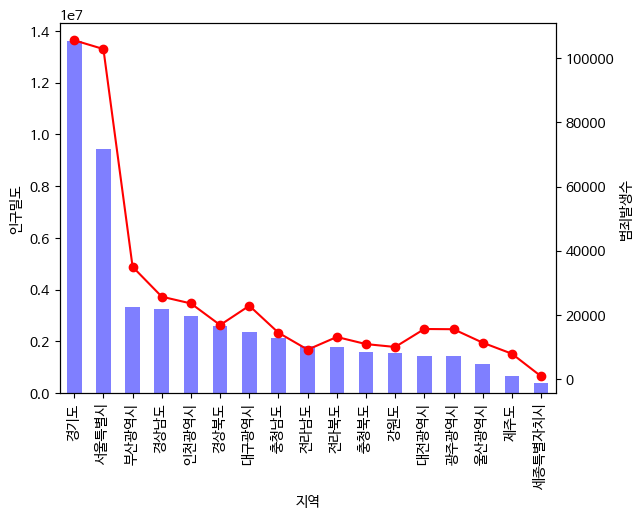

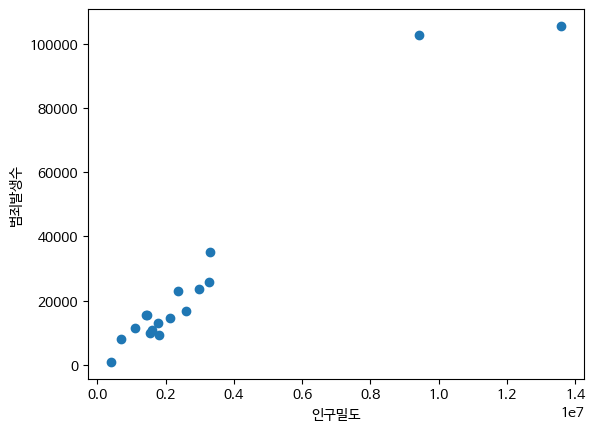

In [6]:
# 비교 그래프 그리기
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='인구수', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='범죄발생수', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('인구밀도')
ax2.set_ylabel('범죄발생수')

plt.show()

# 산점도 그리기
plt.scatter(data['인구수'], data['범죄발생수'])
plt.xlabel('인구밀도')
plt.ylabel('범죄발생수')
plt.show()

In [8]:
# 상관계수 계산
corr = data['인구수'].corr(data['범죄발생수'])
print(f"인구밀도와 자살율 간의 상관계수: {corr:.3f}")

인구밀도와 자살율 간의 상관계수: 0.973
